### CPSC5305 Midterm Exam 

### Part 2: Data Preprocessing and Exploratory Data Analysis (70 pts)

#### Your name and ID

- Date: October 28th 2021

- Name: Anjali Sebastian

- SU ID: 4161227


Write date, name and SU ID to indicate that you understand directions for the exam and have academic integrity stated as “All work I will be submitting is done on my own. No one is involved in my submitted work”. Note that the professor reserves the right to request additional testing if she finds exams were compromised. Blatant cases will be considered academic integrity violations and students will receive a zero on the exam. 


### Introducing iris dataset

Data Information:

This is perhaps the best known database to be found in the pattern recognition literature. [Fisher's paper](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Attribute Information:

1. id - string
3. sepal length in cm - float
3. sepal width in cm - float
4. petal length in cm - float
5. petal width in cm - float
6. name of iris: Setosa, Versicolour, Virginica - string
7. class label: 1, 2, 3 - integer

![Iris](./img/iris.png)

Data files:

- There are two raw data files:

    - file path to data files: './data/iris1.csv' and './data/iris2.csv'
    
    - data values are not stored in any particular order. 
    
    - iris1.csv contains three attributes, id, sepal length and sepal width

    - iris2.csv contains four attributes, id, petal length, petal width, name of iris and class label
    

- Measurements: sepal length, sepal width, petal length, petal width

- 50 samples of 3 different species of iris (150 samples total) 

Your analysis is based on four attributes of iris, sepal length, sepal width, petal length, petal width, and types of iris. 

### 1. Setup the environment and check data files (8 pts)

(1) Import necessary modules

(2) Read the data from given two raw data files and prepare data preprocessing. The current data files may cause errors due to:

- Check how the data is stored in each file

    - Data may not be stored in the expecting data types. 
    - Data may not be in the expecting ranges. 
    - Data values may be missing. 

- Check if there are any values in wrong data types, for example, you expect float values but the data is stored as string (characters). 

- Check if there are any incorrect data (out of data range). 

- Check if there are any missing data. 


Warning: 

- Do not open csv data files using Excel program. 

- Do not modify csv data files using Excel program. 

- Your script files will be tested using our datasets that are similar to the given data files. 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 Reading in both Files

In [2]:
iris1 = pd.read_csv("./data/iris1.csv")
iris1.head()

,id,SepalLen,SepalWid
0,id-021,5.4,3.4
1,id-027,5.0,3.4
2,id-041,5.0,3.5
3,id-078,6.7,3.0
4,id-106,7.6,3.0


In [3]:
iris2 = pd.read_csv("./data/iris2.csv")
iris2.head()

,id,PetalLen,PetalWid,Name,class
0,id-111,5.1,2.0,virginica,3
1,id-015,1.2,0.2,setosa,1
2,id-003,1.3,0.2,setosa,1
3,id-083,3.9,1.2,versicolor,two
4,id-143,5.1,1.9,virginica,3


#### 1.2 Preliminary look at Iris 1 Dataset

In [4]:
# Look at Datatypes
iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        150 non-null    object 
 1   SepalLen  150 non-null    float64
 2   SepalWid  147 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [5]:
# See Shape
iris1.shape

(150, 3)

In [6]:
# Check if unique id given for every row
if (iris1.shape[0]==iris1['id'].nunique()):
    print(True)
else:
    print(False)

True


In [7]:
# See if there are any NaN values
iris1.isna().sum()

id          0
SepalLen    0
SepalWid    3
dtype: int64

#### 1.3 Preliminary look at Iris 2 Dataset

In [8]:
# Look at Datatypes
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        150 non-null    object 
 1   PetalLen  149 non-null    float64
 2   PetalWid  150 non-null    float64
 3   Name      150 non-null    object 
 4   class     150 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [9]:
# See Shape
iris2.shape

(150, 5)

In [10]:
# Check if unique id given for every row
if (iris2.shape[0]==iris2['id'].nunique()):
    print(True)
else:
    print(False)

True


In [11]:
# See if any NaN values
iris2.isna().sum()

id          0
PetalLen    1
PetalWid    0
Name        0
class       0
dtype: int64

Notes: 
- Shape of the both iris datasets are appropriate for joinng on the id column. There is a unique id given in both datasets. 
- Datatype for PetalLen, PetalWidth, SepalLen, SepalWid are all floats which is good. However we will do type conversion on this still incase data includes none numeric values later. 
- Might be better to join on numeric id. So we will remove the "id-" part in the id column and change its type to integer 
- There are some null values in SepalWid, PetalLen that need to be addressed
- We need to look more closely at the Name and class and construct the class from the name if needed

#### 1.4 Look at class and name values in Iris 2

In [12]:
iris2['Name'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Name, dtype: int64

In [13]:
iris2['class'].value_counts()

1      50
3      50
2      49
two     1
Name: class, dtype: int64

Notes: 
- We see that in class the 'two' is causing errors
- There are 3 classes of iris the class class column is encoding the name column as an integer
- setosa = 1 , versicolor = 2 , virginica = 3

### 2. Data Preprocessing (16 pts)

Complete each of the following data preprocessing tasks. All of the data preprocessing should be done in Python scripts. You are not allowed to change the two raw data files. 

(1) Conduct data clearning that includes: 

- Incorrect data handling: 

    - wrong data types
    - values are out of range
    
- Missing data handling    

(2) Data integration: the data from two data files into a DataFrame. Data should be merged based on id. Use id attribute as index for rows. 

(3) Set index to id and drop unused attributeds (Name)

<img src="./img/df.png" alt="DataFrame" style="width: 300px;"/>

(4) Data normalization (using one of two scalers)

- Have two datasets ready: (1) Data without normalization (2) Data normalized by MinMaxScaler or StandardScaler. 

Your next step of EDA should be conducted on these two datasets.

In [14]:
# Delete later a quick re-read prior to processing
iris1 = pd.read_csv("./data/iris1.csv")
iris2 = pd.read_csv("./data/iris2.csv")

#### 2.1  Iris1 - First Round of Preprocessing
- Renaming columns
- Converting id to integer value
- Coversion **in case** Sepal length or width is not numeric
- Recheck datatypes and no. of NaN values 

In [15]:
# rename the iris1 columns
iris1 = iris1.rename({'SepalLen': 'sepal_len','SepalWid': 'sepal_wid'}, axis=1)

# converting to string type
iris1['id'] = iris1["id"].astype("string")

# cleaning the id column , by stripping whitespaces 
iris1['id'] = iris1["id"].str.strip()

# remove the "id-" part in the id 
iris1['id'] = iris1["id"].str.replace("id-","")
iris1['id'] = iris1["id"].str.replace("Id-","")
iris1['id'] = iris1["id"].str.replace("iD-","")
iris1['id'] = iris1["id"].str.replace("ID-","")

# convert id to numeric 
# raise error since we dont want id to be converted to NaN value
iris1['id']= pd.to_numeric(iris1['id'],errors ='raise')

# convert sepal_len,sepal_wid to numeric in case data changes
iris1['sepal_len']= pd.to_numeric(iris1['sepal_len'],errors ='coerce')
iris1['sepal_wid']= pd.to_numeric(iris1['sepal_wid'],errors ='coerce')

iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         150 non-null    int64  
 1   sepal_len  150 non-null    float64
 2   sepal_wid  147 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [16]:
iris1.isna().sum()

id           0
sepal_len    0
sepal_wid    3
dtype: int64

#### 2.2  Iris2 - First Round of Preprocessing
- Renaming columns
- Converting id to integer value
- Coversion **in case** Petal Length or Width is not numeric 
- Recheck datatypes and no. of NaN values 

In [17]:
# rename the iris2 columns
iris2 = iris2.rename({'PetalLen': 'petal_len','PetalWid': 'petal_wid','Name':'name'}, axis=1)

# converting to string type
iris2['id'] = iris2["id"].astype("string")

# cleaning the id column , by stripping whitespaces 
iris2['id'] = iris2["id"].str.strip()

# remove the "id-" part in the id 
iris2['id'] = iris2["id"].str.replace("id-","")
iris2['id'] = iris2["id"].str.replace("Id-","")
iris2['id'] = iris2["id"].str.replace("iD-","")
iris2['id'] = iris2["id"].str.replace("ID-","")

# convert id to numeric 
# raise error since we dont want id to be converted to NaN value
iris2['id']= pd.to_numeric(iris2['id'],errors ='raise')

# convert sepal_len,sepal_wid to numeric in case data changes
iris2['petal_len']= pd.to_numeric(iris2['petal_len'],errors ='coerce')
iris2['petal_wid']= pd.to_numeric(iris2['petal_wid'],errors ='coerce')

# convert the class to integer values. If coerce results in some NaN we will fill using the iris name column
# coerce and then downcast to Integer
iris2['class']= pd.to_numeric(iris2['class'], errors ="coerce")
s = pd.Series(iris2['class'], dtype="Int64")
iris2['class']= pd.to_numeric(s, downcast="integer")

iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         150 non-null    int64  
 1   petal_len  149 non-null    float64
 2   petal_wid  150 non-null    float64
 3   name       150 non-null    object 
 4   class      149 non-null    Int64  
dtypes: Int64(1), float64(2), int64(1), object(1)
memory usage: 6.1+ KB


In [18]:
iris2.isna().sum()

id           0
petal_len    1
petal_wid    0
name         0
class        1
dtype: int64

Note: we see that 'two' has become a NaN values this is to be expected and we will be filling this later.

#### 2.3 Joinng Iris1 and Iris2 on id 

In [19]:
# perform inner join
iris = iris1.merge(iris2, on='id', how ='inner')
iris.head()

,id,sepal_len,sepal_wid,petal_len,petal_wid,name,class
0,21,5.4,3.4,1.7,0.2,setosa,1
1,27,5.0,3.4,1.6,0.4,setosa,1
2,41,5.0,3.5,1.3,0.3,setosa,1
3,78,6.7,3.0,5.0,1.7,versicolor,2
4,106,7.6,3.0,6.6,2.1,virginica,3


In [20]:
# check new dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         150 non-null    int64  
 1   sepal_len  150 non-null    float64
 2   sepal_wid  147 non-null    float64
 3   petal_len  149 non-null    float64
 4   petal_wid  150 non-null    float64
 5   name       150 non-null    object 
 6   class      149 non-null    Int64  
dtypes: Int64(1), float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [21]:
# check if we got back same number of records in new dataset as compared to unjoined iris1
if(iris.shape[0] == iris1.shape[0]):
    print("we are able to do a perfect inner join on iris1 and iris2")
else:
    print("all the id values in iris1 did not have a pair in iris 2 ??")

we are able to do a perfect inner join on iris1 and iris2


#### 2.4 Mapping Classes and Names
Here we use the name column to fill any missing class values. Since the two are redudant.

In [22]:
# Make a mapping dictionary
mapping = {'setosa': 1 , 'versicolor': 2 , 'virginica': 3}

In [23]:
# use mapping on the name colum so that it is now an integer
iris["name"] = iris['name'].map(mapping)

# Find NaN values in the class column and replace them with our mapped values from the name column
iris.loc[iris["class"].isna(),"class"] = iris["name"]

# Then drop the name column
iris = iris.drop(['name'], axis=1)

# Set class column to string
iris['class'] = iris['class'].astype('string')

# look at new dataframe
iris.head()

,id,sepal_len,sepal_wid,petal_len,petal_wid,class
0,21,5.4,3.4,1.7,0.2,1
1,27,5.0,3.4,1.6,0.4,1
2,41,5.0,3.5,1.3,0.3,1
3,78,6.7,3.0,5.0,1.7,2
4,106,7.6,3.0,6.6,2.1,3


In [24]:
iris.isna().sum()

id           0
sepal_len    0
sepal_wid    3
petal_len    1
petal_wid    0
class        0
dtype: int64

#### 2.5 Setting the id column as index 

In [25]:
# sort by id
iris.sort_values(by='id',inplace=True)
iris.head()

,id,sepal_len,sepal_wid,petal_len,petal_wid,class
103,1,9.5,3.5,1.4,0.2,1
119,2,4.9,3.0,1.4,0.2,1
111,3,4.7,3.2,1.3,0.2,1
42,4,4.6,3.1,1.5,0.2,1
145,5,5.0,3.6,1.4,0.2,1


In [26]:
# change index to 'id'
iris = iris.set_index('id')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
id,,,,,
1,9.5,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [27]:
iris.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
id,,,,,
146,6.7,3.0,5.2,2.3,3
147,6.3,2.5,5.0,1.9,3
148,6.5,3.0,5.2,2.0,3
149,6.2,3.4,5.4,2.3,3
150,5.9,3.0,5.1,1.8,3


#### 2.6 Preliminary EDA and Outlier Removal

In [28]:
# descriptive statistics results
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,147.000000,149.000000,150.000000
mean,5.872000,3.058503,3.775168,1.170667
std,0.994017,0.423754,1.758720,0.805730
min,2.800000,2.200000,1.000000,-2.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,9.800000,4.400000,6.900000,2.500000


<AxesSubplot:>

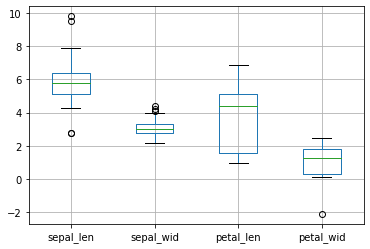

In [29]:
# descriptive statistics results
iris.boxplot()

Note: 
- We see that the min petal width is -2 this is clearly not possible so some outliers need to be removed.
- We also see that there are outliers for sepal_len, sepal_wid. But since the values here are not impossible values we chose to keep them for now.
- According to wikipedia Iris giganticaerulea is the largest iris and the flowers are generally 5 to 6 inches (13 to 15 cm).

In [30]:
# since negative length are not possible we can remove this outlier upfront
# remove any 0 or -ve values
iris.loc[iris['petal_wid']<=0,'petal_wid'] = np.nan
iris.loc[iris['petal_len']<=0,'petal_len'] = np.nan
iris.loc[iris['sepal_wid']<=0,'sepal_wid'] = np.nan
iris.loc[iris['sepal_len']<=0,'sepal_len'] = np.nan

# remove any values greater than 15cm
iris.loc[iris['petal_wid']>15,'petal_wid'] = np.nan
iris.loc[iris['petal_len']>15,'petal_len'] = np.nan
iris.loc[iris['sepal_wid']>15,'sepal_wid'] = np.nan
iris.loc[iris['sepal_len']>15,'sepal_len'] = np.nan

<AxesSubplot:>

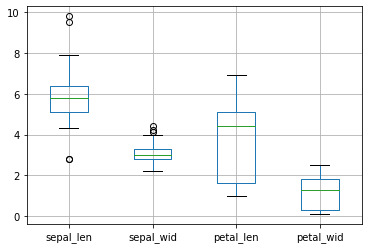

In [31]:
iris.boxplot()

#### 2.7 Handling Missing Values
There are very few values so we would prefer to fill the missing vales than drop the rows.
We are using two different types of imputation (Mean and KNN) and comparing them.

In [32]:
iris.isna().sum()

sepal_len    0
sepal_wid    3
petal_len    1
petal_wid    1
class        0
dtype: int64

In [33]:
# importing both imputers
from sklearn.impute import SimpleImputer
from fancyimpute import KNN

In [34]:
# Doing simple imputer with mean strategy.
# not passing the class column to imputer since this will force convert to float numpy array. Also class is categorical
iris_mean = iris.copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean')
iris_mean.iloc[:, :-1] = mean_imputer.fit_transform(iris_mean.iloc[:, :-1])

In [35]:
#Doing  KNN imputation
iris_knn = iris.copy(deep=True)
knn_imputer = KNN()
iris_knn.iloc[:, :-1] = knn_imputer.fit_transform(iris_knn.iloc[:, :-1])

Imputing row 1/150 with 0 missing, elapsed time: 0.004
Imputing row 101/150 with 0 missing, elapsed time: 0.004


Text(0.5, 1.0, 'KNN imputed Dataset')

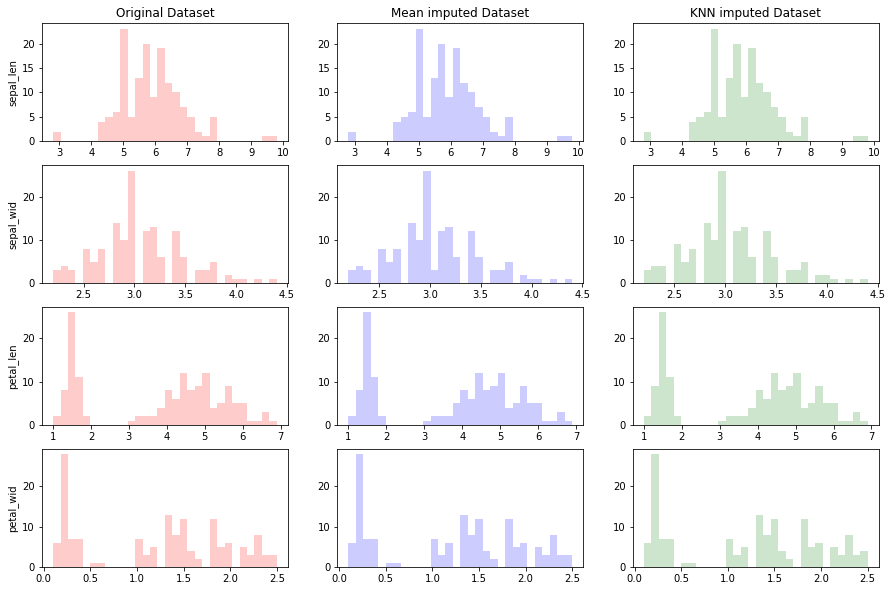

In [36]:
# plotting all histograms and vizualizing what these imputations do to the dataset.
fig,ax = plt.subplots(4,3)
fig.set_size_inches(15,10)
list1 = ['sepal_len','sepal_wid','petal_len','petal_wid']
list2 =[0,1,2,3]
for column,i in zip(list1,list2):
    ax[i][0].hist(iris[column],bins=30,color='red',alpha=0.2)
    ax[i][0].set_ylabel(column)
    ax[i][1].hist(iris_mean[column],bins=30,color='blue',alpha=0.2)
    ax[i][2].hist(iris_knn[column],bins=30,color='green',alpha=0.2)
ax[0][0].set_title("Original Dataset")
ax[0][1].set_title("Mean imputed Dataset")
ax[0][2].set_title("KNN imputed Dataset")

Notes:
- The imputers don't change the shape of the histograms significantly. This is because there are only few missing values.
- Looking sepal length and width we see that they have single modality. While petal length and width look bi-modal
- All the histograms look a bit choppy(with gaps) with some values having zero frequency. This could be either the nature of the iris or due to rounding off when collect the length data. Also we have very few data points (150 only)
- The bi-modality and gaps in the histogram further makes me feel that we should not remove anymore outliers just because of their distance from the mean. We will stick with only removing -ve values. 
- In sepal_wid: The mean imputation is filling a value around 3.0 this is removing a gap which existed in the original data set. The KNN I feel is doing a better job and filling more towards the outlier clusters and maintaining the original shape.
- Therefore we will go ahead with the KNN imputed dataset.

In [37]:
# makeing df the cleaned iris dataset with KNN imputation
df = iris_knn.copy(deep = True)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
id,,,,,
1,9.5,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


#### 2.8 Normalizing the numeric values

In [38]:
from sklearn import preprocessing

In [39]:
# Using MinMax Scalar to mormalize the dataset
df_norm =df.copy(deep=True)
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_norm.iloc[:,:-1] = minmax_scaler.fit_transform(df_norm.iloc[:,:-1])
df_norm.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
id,,,,,
1,0.957143,0.590909,0.067797,0.041667,1
2,0.300000,0.363636,0.067797,0.041667,1
3,0.271429,0.454545,0.050847,0.041667,1
4,0.257143,0.409091,0.084746,0.041667,1
5,0.314286,0.636364,0.067797,0.041667,1


- df = cleaned dataset
- df_norm = normalized using minmax scaler the dataset

### 3. Exploratory Data Analysis (36 pts)

You will conduct an EDA process through descriptive statistics and dat visualization on two datasets you have created in Taks (2). 

Complete each of the following data analysis tasks. 

(1) For each attribute of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(2) For each field of the data, visulize a boxplot of the data. 

(3) For each field of the data, visualize distribution of the data by using histogram. 

(4) For each pair of the data, calculate the Pearson's correlation coefficient factor r. You can use corr() to get pair-wise r values. 

(5) For each pair of the data, visualize a scatter graph. 

(6) Given code segment that uses seaborn library for scatter plots, save the figure in a folder called fig.

(7) Apply one data analysis tool you have learned from Data Camp, which can provide insightful trends (interesting aspects) that are not discovered above. 

(8) Based on the analysis from (1) through (6), identify outliers. If any, decide if you remove them or keep them and provide your reasoning. 

(9) Classification using decision tree algorithm.

    - All implementation for (8) is done. If your data is cleaned, you should be able to run the Decision Tree algorithm on the data. Please make sure that your DataFrame follows the same format as the example shown in (8). 

#### Task (1) :  Five Number Summary

- Get descriptive statistics, count, mean, standard deviation, and the five-number summary of the data: minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.


In [40]:
# descriptive statistics results for non-normalized
df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.872000,3.056188,3.758835,1.201333
std,0.994017,0.432225,1.764185,0.767020
min,2.800000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,9.800000,4.400000,6.900000,2.500000


In [41]:
# descriptive statistics results for normalized dataset
df_norm.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,0.438857,0.389176,0.467599,0.458889
std,0.142002,0.196466,0.299014,0.319592
min,0.000000,0.000000,0.000000,0.000000
25%,0.328571,0.272727,0.101695,0.083333
50%,0.428571,0.363636,0.567797,0.500000
75%,0.514286,0.500000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Notes: We can see that the MinMax Scalar has fit all the values between 0 and 1.

#### Task (2) :  Boxplot Vizualization

- For each field of the data, visulize a boxplot of the data.

<AxesSubplot:>

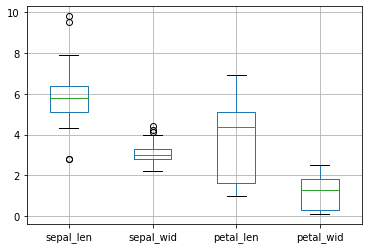

In [42]:
# Boxplot for non-normalized data
df.iloc[:,:-1].boxplot()

<AxesSubplot:>

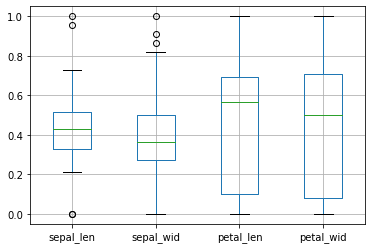

In [43]:
# Boxplot for normalized data
df_norm.iloc[:,:-1].boxplot()

Note: Looking at the boxplots we can see that the MinMax scaler id stretching out some features and squeezing some other features. The sepal_length which tends to have a higher value in is adjusted between (0,1). petal_wid with tends to have smaller values is now comparable in strength to the other features.  

#### Task (3) : Histogram Visualization
- For each field of the data, visualize distribution of the data by using histogram.

Text(0.5, 1.0, 'Normalized Dataset')

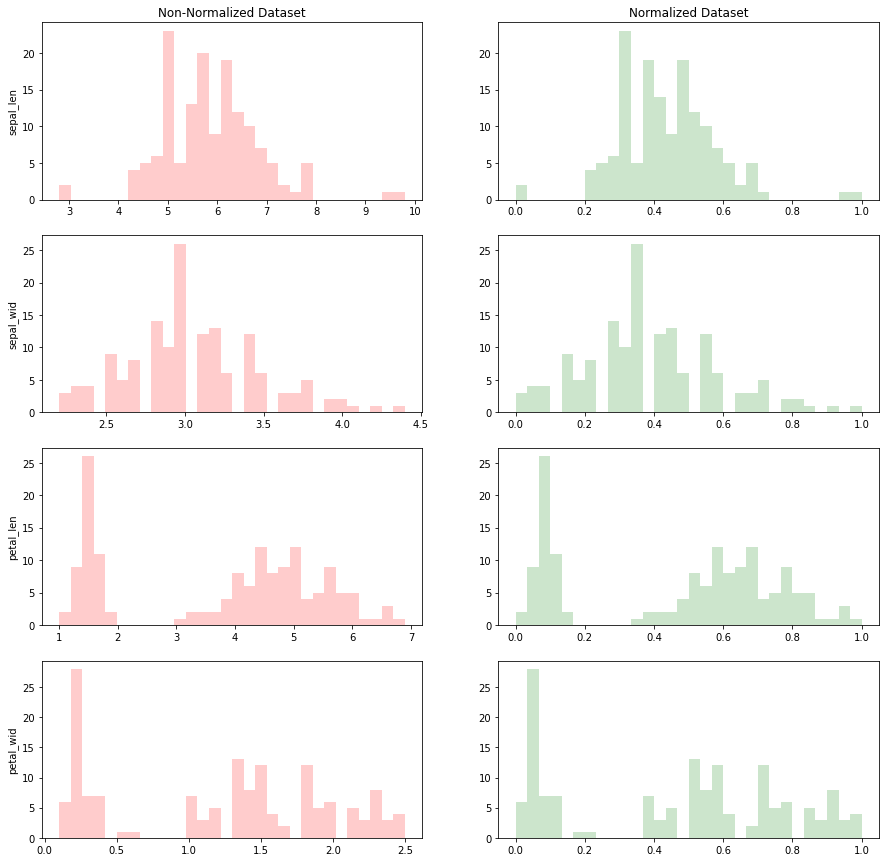

In [44]:
# plotting all histograms and vizualizing both normalized and non-nomalized data.
fig,ax = plt.subplots(4,2)
fig.set_size_inches(15,15)
list1 = ['sepal_len','sepal_wid','petal_len','petal_wid']
list2 =[0,1,2,3]
for column,i in zip(list1,list2):
    ax[i][0].hist(df[column],bins=30,color='red',alpha=0.2)
    ax[i][0].set_ylabel(column)
    ax[i][1].hist(df_norm[column],bins=30,color='green',alpha=0.2)
    
ax[0][0].set_title("Non-Normalized Dataset")
ax[0][1].set_title("Normalized Dataset")

Note: Normalization does not change the overall shape of the histogram

#### Task (4) : Pearsons Correlation
- For each pair of the data, calculate the Pearson's correlation coefficient factor r. You can use corr() to get pair-wise r values.

In [45]:
# get the correlation r values for each pair of the not normalized data
df.corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.033946,0.666955,0.615002
sepal_wid,-0.033946,1.000000,-0.425991,-0.359179
petal_len,0.666955,-0.425991,1.000000,0.961766
petal_wid,0.615002,-0.359179,0.961766,1.000000


In [46]:
# get the correlation r values for each pair of the  normalized data
df_norm.corr()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.033946,0.666955,0.615002
sepal_wid,-0.033946,1.000000,-0.425991,-0.359179
petal_len,0.666955,-0.425991,1.000000,0.961766
petal_wid,0.615002,-0.359179,0.961766,1.000000


Notes: 
- Normalizing the date should not change the correlation between them as we can see. 
- Also petal_wid and petal_len are highly correlated to each other (0.96)


#### Task (5) Scatter Plot Pairs
- For each of the following pairs of the data, visualize a scatter plot.

- Pairs we are interested in


-- SepalLen-SepalWid

-- PetalLen-PetalWid

-- SepalLen-PetalLen

-- SepalWid-PetalWid

-- SepalLen-PetalWid

-- SepalWid-PetalLen

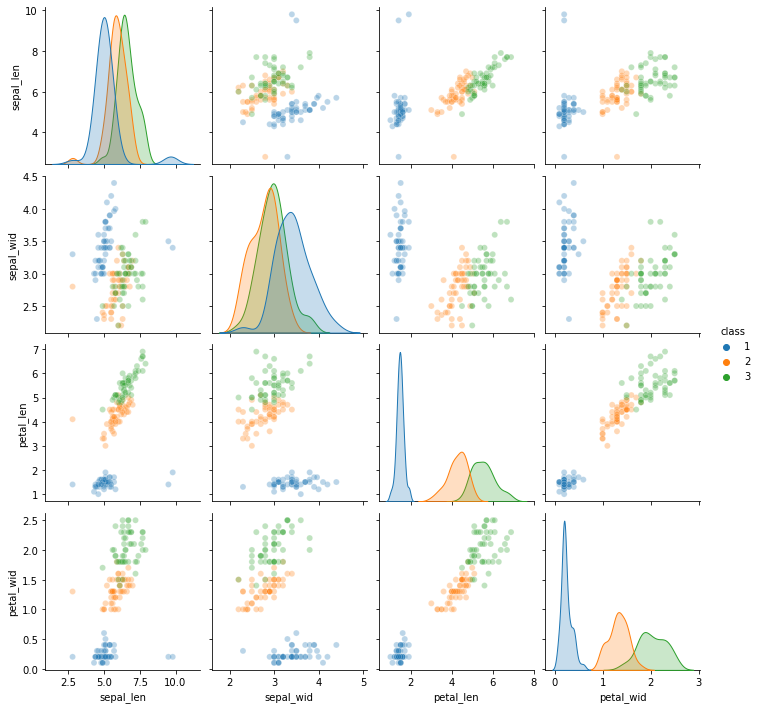

In [47]:
# SNS Pairplots
sns.pairplot(df, hue='class', plot_kws={'alpha':0.3})
plt.show()

Notes: 
- The setosa variety (class = 1) has the smallest petals with some of the largest sepal length and width. Its sepal size spread accross having high deviation. The petal size is small and with very low deviation - sharp curve 
- The versicolor variet tend to always be it the middle
- The virginica variety has very large and wide petals with average sepal width and length
- Although some scatter plots show a few outliers the oulier in sepal_len and sepal_width plots are not ouliers in petal_len and petal_wid plot. They clearly fall into a cluster and show high correlation. So we will not be removing these outliers.

#### Task (6) : Swarm plot and save figure to file

We would like to save a figure generated by data plotting in a local folder named fig. The current cell generates a plot and display it. But it does not save the figure. 

- Check the given folder of midterm_part2 if you have a folder named fig. 

- Add a Python statement to save the figure as 'iris_scatter.png' in figures folder. You need to pass a relative path of the file as parameter to a function of matplotlib.pyplot. 

- Once you execute the cell, check the folder fig if 'iris_scatter.png' file is saved. 

- I assume that the data is stored in a DataFrame named df. 

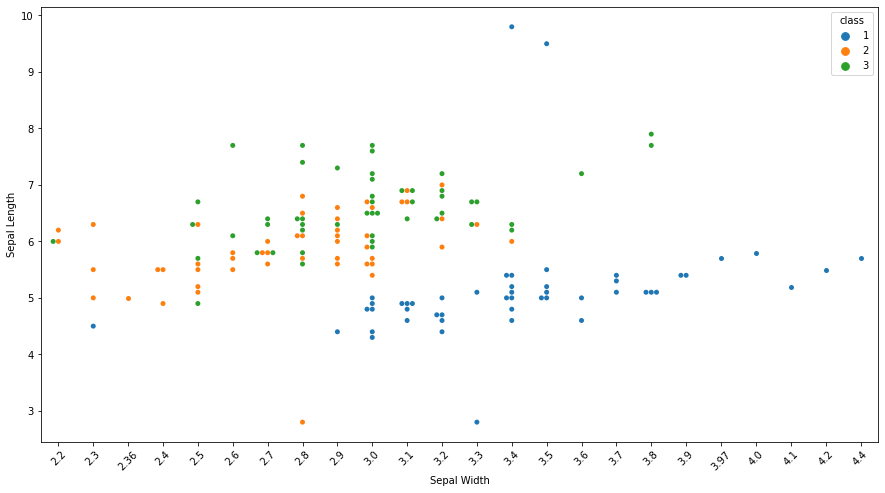

In [48]:
# import seaborn module
import matplotlib.pyplot as plt
import seaborn as sns

# for xtick rounding up
df_sns = df.copy(deep=True)
df_sns['sepal_wid'] = df_sns['sepal_wid'].round(decimals=2) 

#Added
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df_sns, x='sepal_wid', y='sepal_len', hue="class")
ax.set(xlabel='Sepal Width', ylabel='Sepal Length')

#Format xticks to 1 decimal and display nicely 
plt.xticks(rotation=45 )



# Save the figure and display the plot. Currenly it only displays the figure. 
fig.savefig("./fig/iris_scatter.png")
plt.show()

#### Task(7) : Something interesting from DataCamp
- Apply one data analysis tool you have learned from Data Camp, which can provide insightful trends (interesting aspects) that are not discovered above

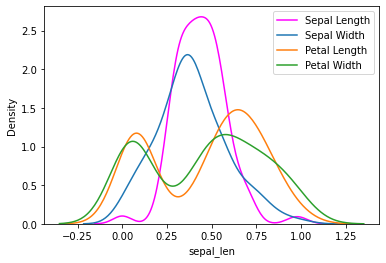

In [49]:
sns.kdeplot(df_norm['sepal_len'], label="Sepal Length", color ="Magenta")
sns.kdeplot(df_norm['sepal_wid'], label="Sepal Width")
sns.kdeplot(df_norm['petal_len'], label="Petal Length")
sns.kdeplot(df_norm['petal_wid'], label="Petal Width")
plt.legend()

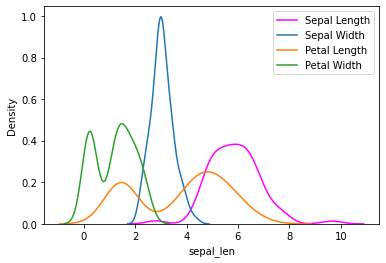

In [50]:
sns.kdeplot(df['sepal_len'], label="Sepal Length",color ="Magenta")
sns.kdeplot(df['sepal_wid'], label="Sepal Width")
sns.kdeplot(df['petal_len'], label="Petal Length")
sns.kdeplot(df['petal_wid'], label="Petal Width")
plt.legend()

Notes: The two kdeplots of normalized and not normalized data show the same pattern for Sepal Width, Petal Length, Petal Width as they did in the histogram. 
- Sepal Width has single modal with slight right skew.
- Petal Length and Petal Width are both bi-modal. More clearly visible in kdeplot
- However looking at Sepal Length (Magenta colored) there is a slight tri-modality where the suspected outliers were present. This is interesting as the ouliers in this case form a very tiny cluster and therefore we cannot tell if tri-modality is indeed the distribution for iris sepal lengths or these small peaks are just error outliers that need to be removed.
- Since the outlier do form a cluster albeit very small it makes sense to not remove them.

####  Task (8) 

Cluster analysis

- Based on your analysis (1) through (6), identify outliers and decide either you remove them or keep them. The decision should be suppored by rationale. 

1. Descriptive analysis indicated one negative value which was immediately removed. The min and max values after removing the negative value are reasonable and possible.
2. Based on analysis of histogram we see that some frequencies have gaps and some features show bi-modality. This again argues for not removing any outlier as seen in the boxplot. (above 1.5X)
3. Scatter plot of various pairs on sepal and petal, length and width show that a few outlier are present for the sepal scatter plots. However they all correlate highly and form tight clusters in the petal scatter plots. If these values are corrupt outliers it makes no sense that the sepal values were not correctly measured but the petal values for the same data point were correctly measured.
4. The kdeplot show slight trimodality for sepal length.
5. The swarm plot similarly shows that the outliers for sepal_len vs sepal_width are mostly of setosa variety which has higher spread seen in sns.pairplots()
**Therefore we will not remove anymore outliers at this stage**

#### Task (9) Apply Decision Tree Classifier 

Please make sure that your DataFrame named df and it includes five attributes as shown below:

<img src="./img/df.png" alt="DataFrame" style="width: 300px;"/>

- The two cells below are completely done. If you have a cleaned data stored in a dataframe df, these cells should work without any issues. 

- The given examples show a k-cross validation framework and an application of decision tree (Gini algorithm) classifier, and basic process of model evaluation. 


In [51]:
df.head()
# index is slightly different but should not impact the Decisicion Tree 

,sepal_len,sepal_wid,petal_len,petal_wid,class
id,,,,,
1,9.5,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


#### 9.1 DecisionTreeClassifier with Not Normalized data

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X = df.iloc[:, :4] # petal length and width
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

target_names = ['setosa', 'versicolor', 'virginica']
column_names = df.drop(['class'], axis=1).columns

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

[[12  0  0]
 [ 0 16  2]
 [ 0  3 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.84      0.89      0.86        18
   virginica       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



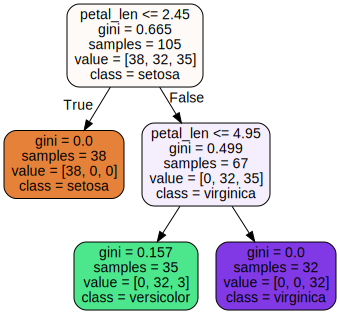

In [53]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

IMAGES_PATH = './fig'

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

#### 9.2 DecisionTreeClassifier with With Normalized data

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X = df_norm.iloc[:, :4] # petal length and width
y = df_norm.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

target_names = ['setosa', 'versicolor', 'virginica']
column_names = df_norm.drop(['class'], axis=1).columns

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

[[12  0  0]
 [ 0 15  1]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.94      0.91        16
   virginica       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



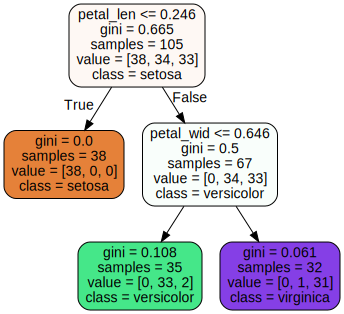

In [55]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

IMAGES_PATH = './fig'

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### 4. Data Analysis Report (10 pts)

Write a report of what you find from the data. Your report should include the following:

(a) A summary from the observation of the five number summaries in (1) and boxplots in (2).

(b) A summary about data’s modality (i.e., bimodal, trimodal, etc.) from the histograms in (3).

(c) A summary from correlation results in (4) and scatter graphs in (5)

(d) A summary from outlier analysis (8). 

(e) A summary from the results of Decision Tree classifier on this data (9). In particular, discuss how normalization affects the performance of the Decision Tree classifier. 
    

#### Analysis report



---
# Date Analysis Report
---

For the mid-term assignment, we are working with the iris dataset a well known dataset in the data science world. The iris dataset provided is stored in **two separate .csv files** and contains features regarding the sepal length and width as well as the petal length and width of **three different types/species** of the  iris flower in centimeters. The type to which is iris belongs is also provided in two redundant columns - 'class' and 'name'. The **class is encoded** as follows. Setosa = 1, Versicolour = 2 , Virginica = 3

### 1. INITIAL LOOK AND UNDERSTANDING
After loading both the datasets and looking at their shape and datatypes the following is observed:

* The shape of both iris datasets are appropriate for **joining on the id column** and both datasets have a **unique id** that can be used for carrying out an **inner join**
* Datatype for PetalLen, PetalWidth, SepalLen, SepalWid **are all floats** which is good. However, we **will do type conversion** on this incase data includes non-numeric values later.
* The 'id' column has **string 'id-001'** which I think would be better to manipulate if **converted to an integer** and then set as the index.
* There are **some null values** in SepalWid, PetalLen that need to be addressed
* There are a total of 150 records, with 50 for each type of iris. The class column has a single typo issue where **"2" has been miswritten as "two"**.

### 2. DATA PREPROCESSING
In the data processing part, we not only tried to address some of the issues detected in the initial part but also **do some preliminary EDA** in order to check the data to see if there are any major quality issues or obvious outliers. Some of the pre-processing done is as follows.

* The first round of preprocessing involved setting the right datatypes and converting id values to numeric done on both datasets.
* Joining the two datasets and checking if **inner join** produced the expected results.
* Fix the "two" in the "class" column and drop the redundant "name" column.
* Although the "class" column has 1,2,3 integer values this is **stored as string since class is categorical** .
* Setting the integer "id" column as the index.

At this point our data is at a stage where we can do some preliminay EDA to see if the distributions make sense or not. 

* Using descriptive analysis and boxplots it is clear that there outliers. 
* We see that the min petal width is -2 this is clearly not possible so **some outliers need to be removed.**
* We also see that there are outliers for sepal length, sepal width. But since the values here are not impossible values we chose to keep them for now.  

After removing the obvious outliers (<=0) we fill in missing values using both mean strategy and KNN and compare the new dataframes to original dataframe using a set of histograms.

- The imputers don't change the shape of the histograms significantly. This is because there are only few missing values.
- **Modality:** Sepal length and sepal width has single modality. Petal length and petal width are bi-modal.
- All the histograms look a bit **choppy(with gaps)** with some values having zero frequency. This could be either the nature of the iris or due to rounding off when collect the measurements. Also we have very few data points (150 only)
- **Choosing imputation method:** In sepal_wid mean imputation is filling a value around 3.0 this is removing a gap which existed in the original data set. The KNN I feel is doing a better job and filling more towards the outlier clusters and maintaining the original shape.Therefore we will go ahead with the **KNN imputed dataset.**

After cleaning and imputing missing values in the dataset we create a dataframe with **normalized values using the MinMaxScaler().**

### 3. DETAILED EDA

Exploratory Data Analysis was carried out **on both the non-normalized data and the normalized data**. Here are some of the analysis

##### Descriptive Analysis: 
- After removing  the negative values the min, max, are resonable. max= 9.8 cm is possible since according to wikipedia **a large iris can be upto 15 cm in length.**
-  We can see that the MinMax Scalar has fit all the values between 0 and 1 for all the 4 features.

##### Boxplot and Histograms: 

- Looking at the boxplots we can see that the MinMax scaler is stretching out some features and squeezing some other features.
- Normalization does not change the overall shape of the histogram. 
- Modality is similar to modality found during pre-processing.
 
##### Correlation, ScatterPlots and Cluster Analysis:

- Normalizing the data should not change the correlation between them as we can see.
- **petal_wid and petal_len are highly correlated to each other (0.96)**
- The **setosa variety** (class = 1) has the smallest petals with some of the largest sepal length and width. Its sepal size spreads accross having high deviation. The petal size is small and with very low deviation - sharp curve
- The **versicolor variety** tends to always be in the middle
- The **virginica variety** has very large and wide petals with average sepal width and length
- Although some scatter plots show a few outliers in sepal_len and sepal_width plot these are not ouliers in **petal_len and petal_wid plot.** They **clearly fall into a cluster and show high correlation**. So we will not be removing these outliers.

##### Kdeplot: 
- The two kdeplots of normalized and not normalized data show the same pattern for Sepal Width, Petal Length, Petal Width as they did in the histogram.
- Sepal Width has single modalilty with **slight right skew**.
- Petal Length and Petal Width are both bi-modal. This is more clearly visible in kdeplot
- **Interesting find in kdeplot:** However looking at **Sepal Length (Magenta colored)** there is **a slight tri-modality** where the suspected outliers were present. This is interesting as the outliers in this case form a very tiny cluster and therefore we cannot tell if tri-modality is indeed the distribution for iris sepal lengths or these small peaks are just error outliers that need to be removed.
- Since the outlier do form a cluster albeit very small it makes sense to not remove them.


### 4. EXPLAINING OUTLIER SELECTION
1. Descriptive analysis indicated one negative value which was immediately removed. The min and max values after removing the negative value are reasonable and possible.
2. Based on analysis of histogram we see that some frequencies have gaps and some features show bi-modality. This again argues for not removing any outlier as seen in the boxplot. (above 1.5X)
3. Scatter plot of various pairs on sepal and petal, length and width show that a few outlier are present for the sepal scatter plots. However they all correlate highly and form tight clusters in the petal scatter plots. If these values are corrupt outliers it makes no sense that the sepal values were not correctly measured but the petal values for the same data point were correctly measured.
4. The kdeplot shows slight trimodality for sepal length.
5. The swarm plot similarly shows that the outliers for sepal_len vs sepal_width are mostly of setosa variety which has higher spread seen in sns.pairplots()

##### Therefore we will not remove anymore outliers

### 5. RESULTS OF DECISION TREE CLASSIFIER
- The results from the decision tree classifier shows high predictive values for both normalized and non-normalized data. Precision, Recall, Accuracy are all higher than 80 or 90 for multiple runs.
- The models show different results with different runs depending on how the desicion tree was traversed. 
- Both decision trees accross multiple runs are excellent at classifying setosa variety with perfect precision =1 and recall=1
- The normalized decision tree classifier is slightly better for classifying virginica and versicolor than non-normalized for precision and recall values.
- After running the models multiple times the grahviz for non-nomalized can have a different branch pattern than the normalized model. 
- On one of the runs the normalized data produced prefect results. Most likely overfitting.



### 6. REFERENCES
1. https://en.wikipedia.org/wiki/Iris_giganticaerulea#:~:text=8%20External%20links-,Description,2%E2%80%934%20cm)%20thick.
2. https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string
3. https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/
4. https://stackoverflow.com/questions/40243753/exception-dot-not-found-in-path-in-python-on-mac

 








Example of overfit:

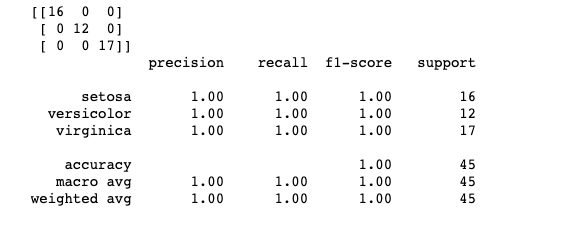

# ---END---